In [2]:
import numpy as np
import cv2
from src.rle import rle

In [36]:
PIECE_ID = 'b'
im_path = 'data/pointclouds/test/{}/pred_img/'.format(PIECE_ID)


In [37]:
pred = np.load(im_path + 'prediction.npy')
pred.mean()

12.346013537547764

In [38]:
print(pred.min(), pred.max(), pred.mean(), pred.std())

0.0 35.32215401530266 12.346013537547764 11.889408880133505


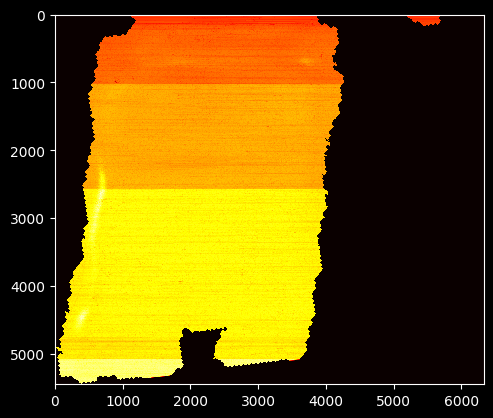

In [39]:
import matplotlib.pyplot as plt
# plot heatmap
plt.imshow(pred, cmap='hot', interpolation='nearest')
plt.show()

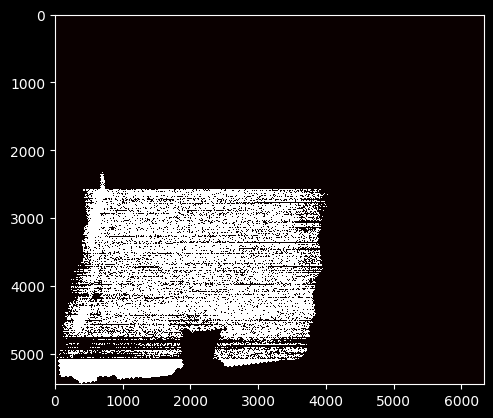

In [47]:
# Apply sigmoid and thraeshold
sample_pred = 1 / (1 + np.exp(-pred / 65))
sample_pred = sample_pred > sample_pred.mean()+sample_pred.std()+0.005
# sample_pred = sample_pred > 0.999999999999965
plt.imshow(sample_pred, cmap='hot', interpolation='nearest')
plt.show()

In [16]:
cv2.imwrite('prediction_{}.png'.format(PIECE_ID), pred)

True

In [16]:
import torch
from torch.nn import Sigmoid
sigmoid = Sigmoid()

In [17]:
flat = pred.flatten()
flat = torch.from_numpy(flat)
flat = sigmoid(flat)
flat = flat.numpy()
flat = flat.reshape(pred.shape)
new_pred = flat * 255


In [18]:
starts_ix, lengths = rle(flat)
inklabels_rle = " ".join(map(str, sum(zip(starts_ix, lengths), ())))
print(f"Id,Predicted\n{PIECE_ID}," + inklabels_rle, file=open('inklabels_rle{}.csv'.format(PIECE_ID), 'w'))

In [19]:
cv2.imwrite('prediction_{}_sigmoid.png'.format(PIECE_ID), new_pred)

True

In [20]:
new_pred.max()

238.9005250536332

In [21]:
new_pred.mean()

125.90210016290642

In [22]:
new_pred.min()

113.01621105798542

In [1]:
new_pred = new_pred / 255

NameError: name 'new_pred' is not defined

In [ ]:
import sys

#  copy csg file to output folder
import shutil
shutil.copyfile('data/pointclouds/test/{}/pred_img/{}.csg'.format(PIECE_ID, PIECE_ID), 'prediction_{}.csg'.format(PIECE_ID))